In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model

In [2]:
dataset = pd.read_csv("student-por.csv", sep=";")

In [14]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Predecir las notas G1 respecto a las fallas "failures" y el tiempo de estudio "studytime"

#### Definir conjunto de entrenamiento y pruebas

In [16]:
porcentaje_entrenamiento = 0.8
porcentaje_pruebas = 1- porcentaje_entrenamiento

In [18]:
fila_max_entrenamiento = round(dataset.shape[0]*porcentaje_entrenamiento)
print(fila_max_entrenamiento)

519


In [19]:
train = dataset.loc[:fila_max_entrenamiento-1,:]
test = dataset.loc[fila_max_entrenamiento: , :]

In [20]:
X_train = train[["failures", "studytime"]].values
X_test = test[["failures", "studytime"]].values

In [23]:
y_test = test.loc[:,"G1"].values
y_train = train.loc[:, "G1"].values

#### Modelo de regresion lineal 

In [31]:

regresion_train = linear_model.LinearRegression()
regresion_train.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### Predicion de y respecto al conjunto X de pruebas

In [26]:
y_pred = regresion_train.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
import math

In [30]:
math.sqrt(mean_squared_error(y_pred, y_test))

3.1057344681906436

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error

In [33]:
mean_absolute_error(y_test, y_pred)

2.5654587191850675

In [34]:
r2_score( y_test, y_pred)

0.055800298193187325

#### Visualizaciones

In [35]:
import seaborn as sb

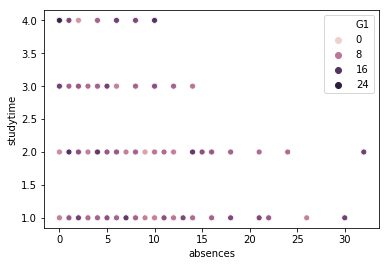

In [38]:
#sb.scatterplot(data=datset_sin_nulos, x="edad", y="no.hijos")
sb.scatterplot(data=dataset, x="absences", y="studytime", hue="G1")

## Analisis de variables cualitativas

In [39]:
dataset.describe(include=np.object)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [42]:
dataset.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [45]:
dataset.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

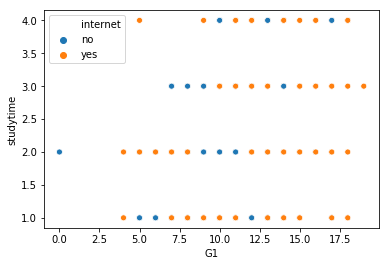

In [47]:
sb.scatterplot(data=dataset, x="G1", y="studytime", hue="internet")